# Age Estimation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Digital_Image_Processing_Regression_Classification/data/Classification_with_CNN'

/content/drive/MyDrive/Digital_Image_Processing_Regression_Classification/data/Classification_with_CNN


In [3]:
import os
import numpy as np
import torch
from helperT import *

# Loading Data

PyTorch Datasets are objects that have a single job: to return a single datapoint on request. The exact form of the datapoint varies between tasks: it could be a single image, a slice of a time series, a tabular record or something else entirely. These are then passed on to a Dataloader which handles batching of datapoints and parallelism. 

We've written the dataloader function and transform function for you. `get_dataloaders()` will return three object: train_loader, val loader and test_loader.

```
Arguments:
    None
Return:
    train_loader      -- tensor,(y, x), [(32),(32, 2048)] 
    val_loader        -- tensor,(y, x), [(32),(32, 2048)] 
    test_loader       -- tensor,(y, x), [(32),(32, 2048)] 
```

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


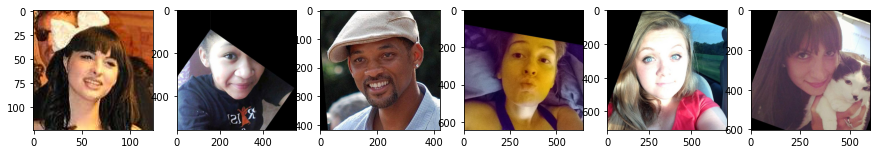

In [4]:
train_loader, val_loader, test_loader = get_dataloaders("DATASET/")
show_data('DATASET/')

# Define Model
In this part, we will define our linear regression model here. First let's declare a class called `LinearClassifier` that inherit from `torch.nn.moudle`. Then you have to define the initialization in `__init__`, and define forward propogation in `forward` function.
Hint: You can use torch.nn.Linear.
```
Arguments:
    __init__        --(input_size, output_size)
Return:
    out      -- tensor, network calculation results 
```


In [5]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearClassifier, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = x @ self.linear.weight.T + self.linear.bias
        return out

In [6]:
## Test ##
model = LinearClassifier(10, 2)
x = torch.zeros((5, 10))
y = model(x)
assert y.shape[0] == 5
assert y.shape[1] == 2
print('test passed')

test passed


# softmax + CELoss

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> training finished


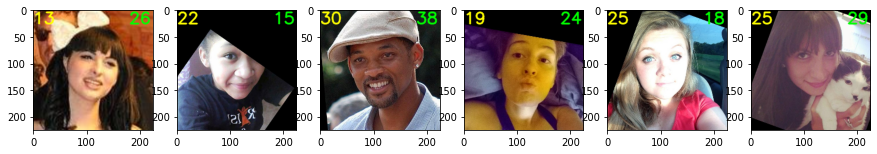

In [7]:
def train_softmax_cel():
    # Define model
    model = LinearClassifier(2048, 101).cuda()
    
    # Define SGD optimizer to update our weights and bias
    optimizer = torch.optim.Adam(model.parameters(), lr=TRAIN_LR)
    
    # Define criterion to calculate loss
    criterion = torch.nn.CrossEntropyLoss()

    for e in range(EPOCH):
        # Training model
        model.train()

        for i, (y, x) in enumerate(train_loader):
            optimizer.zero_grad()
            x, y = x.cuda().float(), y.cuda().long() 

            # calculate the gradient and update the model
            pred = model(x)
            loss = criterion(pred, y)

            loss.backward()
            optimizer.step()

       # Validating model
        model.eval()
        gt = []
        preds = []

        for i, (y, x) in enumerate(val_loader):
            x, y = x.cuda().float(), y.cuda().long()  
            outputs = model(x)

            # Save the predictions for validation sets and ground truth
            preds.append(torch.argmax(outputs, dim=-1).cpu().detach().numpy())
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)

        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        
    print("=> training finished")
    return model, preds, gt

model_softmax_cel, preds, gt = train_softmax_cel()
show_results(preds, gt)

# Test and Generate results file

In [8]:
prediction = test_cel(model_softmax_cel, test_loader, "softmax_cel.txt")
print("Test results has saved to softmax_cel.txt")
print(prediction[:10])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Test results has saved to softmax_cel.txt
[25.87942167 61.72379612 49.02814477 20.85438167 31.18377422 35.22322242
 52.83037516 41.50798477 21.87593306 57.41793691]
